# Numerical chaos in the logistic map and floating point error

One of the most classic examples of chaotic behavior in non-linear
systems is the iteration of the logistic map

$$
x_{n+1} = f(x_n) = r x_n (1-x_n)
$$

which for $x in (0,1)$ and $r in (0,4)$ can produce very surprising
behavior. We'll revisit this system later with some more sophisticated
tools, but for now we simply want use it to illustrate numerical
roundoff error.

Computers, when performing almost any floating point operation, must by
necessity throw away information from the digits that can't be stored at
any finite precision. This has a simple implication that is nonetheless
often ovelooked: algebraically equivalent forms of the same expression
aren't necessarily always numerically equivalent. A simple illustration
shows the problem very easily:

For this exercise, try to find three different ways to express $f(x)$
in logistic-map and compute the evolution of the same initial condition
after a few hundred iterations. For this problem, it will be extremely
useful to look at your results graphically; simply build lists of
numbers and call matplotlib's `plot` function to look at how each trace
evolves.

**Note:** this was inspired by this [very nice presentation](https://code.google.com/p/python-turtle-demo/downloads/detail?name=SevenWaysToUseTurtle-PyCon2009.pdf) about Python's turtle module, which includes some great numerical examples.


The following snippet can be used as a starting point, and it includes
some hints on what values of $r$ to look at:

In [7]:
"""Illustrating error propagation by iterating the logistic map.

f(x) = r*x*(1-x)

Write the above function in three algebraically equivalent forms, and study
their behavior under iteration.  See for what values of r all forms evolve
identically and for which ones they don't.
"""

import matplotlib.pyplot as plt

# Interesting values to try for r:
# [1.9, 2.9, 3.1, 3.5, 3.9]
r = 3.9 # global default
x0 = 0.6  # any number in [0,1] will do here
num_points = 100  # total number of points to compute
drop_points = 0  # don't display the first drop_points

The three algebraically, but not numerically, equivalent forms of $f(x)$:

In [4]:
def f1(x): return r*x*(1-x)
def f2(x): return r*x - r*x**2
def f3(x): return r*(x-x**2)

Now, we compute and plot results with these three forms of $f(x)$:

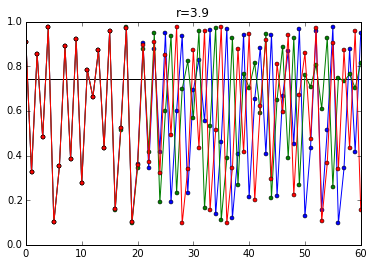

In [8]:
%matplotlib inline

fp = (r-1.0)/r
x1 = x2 = x3 = x0
data = []
data.append([x1,x2,x3])

for i in range(num_points):
    x1 = f1(x1)
    x2 = f2(x2)
    x3 = f3(x3)
    data.append([x1,x2,x3])

# Display the results
plt.figure()
plt.title('r=%1.1f' % r)
plt.axhline(fp, color='black')
plt.plot(data[drop_points:], '-o', markersize=4);